# Object detection in drawings


*   Sparate components by HSV color space
*   Object detection using template matching
*   Object detection using feature matching

*ILO:* Through this tutorial, we hope you can grasp the basic idea of using Computer Vision (CV)-based methods include **template matching** and **feature matching** for object detection in MEP drawings.
<br>

<img src="https://github.com/CrossStyle/MEP2BIM/blob/main/img/CAD-1.png?raw=true" width="600">



## Separate drawings with different colors



### Load and show a image

In [1]:
# import relevent libraries
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request
import cv2
import numpy as np
import copy

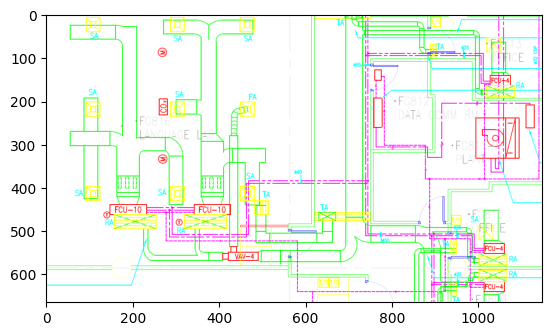

In [2]:
# load an image of a drawing
req = urllib.request.urlopen("https://raw.githubusercontent.com/SeanXunIC/CIVL4210/refs/heads/main/A3%20-%20Recognizing%20components%20in%202D%20drawing%20with%20CV/image/CAD-1.png")

# Convert the response to byte format, then convert to BGR (Blue, Green, Red) format by OpenCV lib.
raw_img = np.asarray(bytearray(req.read()), dtype="uint8")
raw_img = cv2.imdecode(raw_img, cv2.IMREAD_COLOR)

# Using the cv2.cvtColor function to convert BGR format to RGB format.
img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

### Sparate components by HSV color space

The HSV color space is commonly used in image processing. It is close to our perceptual experience of color and provides a very intuitive representation of the hue, vividness, and lightness of colors. It is not difficult to track objects of a certain color in HSV color space.

The HSV representation of a color image consists of three parts:

1.   Hue: [0, 180]
2.   Saturation: [0, 255]
2.   Value: [0, 255] (when adjust the Value, just like adjust the brightness of the mobile phone screen)


![preview](https://pic1.zhimg.com/v2-e9f9c843e7d60e8f7aa7de1cd61d1818_r.jpg)


![enter image description here](https://i.stack.imgur.com/TSKh8.png)


In [3]:
# convert image from RGB to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

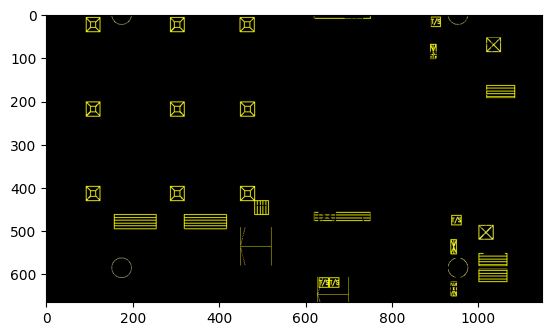

In [4]:
# we want to filter out the component pixels with specific color

# Yellow
# H 15-36 S 40-255 V 40-255
mask_yellow = cv2.inRange(hsv, np.array([15, 40, 40]), np.array([36, 255, 255]))  # define the color mask
img_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)
plt.imshow(img_yellow)

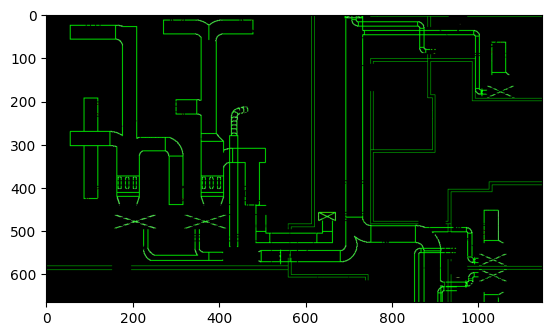

In [5]:
# Green [40, 70]
# H 40-70 S 40-255 V 40-255
mask_green = cv2.inRange(hsv, np.array([40, 40, 40]), np.array([70, 255, 255]))
img_green = cv2.bitwise_and(img, img, mask=mask_green)
plt.imshow(img_green)


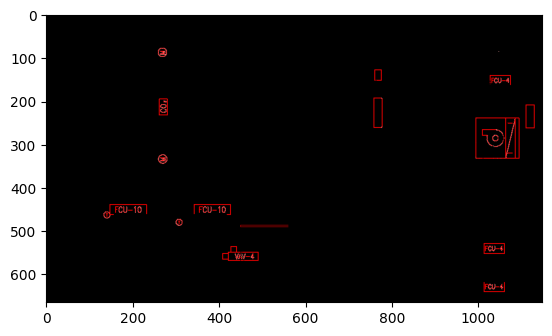

In [7]:
# Question 1 What's the H value of red color?

# H ?   S 40-255 V 40-255
# mask_red = cv2.inRange(hsv, np.array([?,40, 40]), np.array([?, 255, 255]))

mask_red = cv2.bitwise_and(img, img, mask=mask_red)
plt.imshow(mask_red)

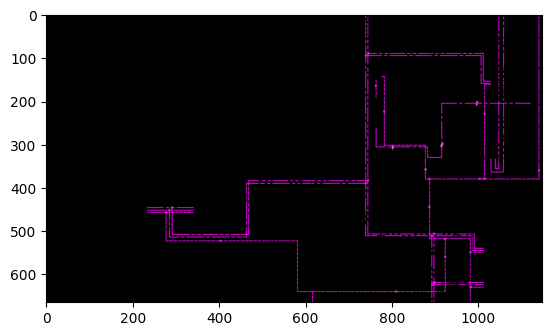

In [8]:
# purple H [140, 160]
# H 140-160 S 40-255 V 40-255
mask_purple = cv2.inRange(hsv, np.array([140,40, 40]), np.array([160, 255, 255]))
img_purple = cv2.bitwise_and(img, img, mask=mask_purple)
plt.imshow(img_purple)

## Object detection using template matching
Template matching is one of the most basic pattern recognition methods. Specifically, it use the squared error to calculate the differents between a template and an original image, with the best match being 0, indicating there is no diferences.

$
R(x, y)=\sum_{x^{\prime}, y^{\prime}}\left(T\left(x^{\prime}, y^{\prime}\right)-I\left(x+x^{\prime}, y+y^{\prime}\right)\right)^{2}\
$


Template matching also has limitations. The algorithm fails if the target is **rotated** or **changed in size** in the original image.

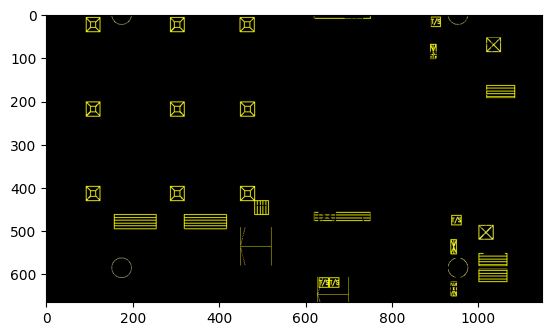

In [9]:
# show the targets: yellow components
plt.imshow(img_yellow)

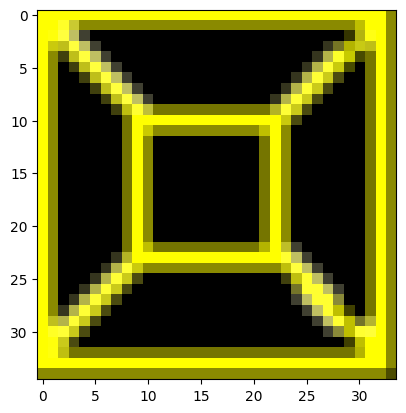

In [28]:
# load template image
req_yellow_template = urllib.request.urlopen("https://raw.githubusercontent.com/SeanXunIC/CIVL4210/refs/heads/main/A3%20-%20Recognizing%20components%20in%202D%20drawing%20with%20CV/image/yellow_tem.png")
yellow_template = np.asarray(bytearray(req_yellow_template.read()), dtype="uint8")
yellow_template = cv2.imdecode(yellow_template, cv2.IMREAD_COLOR)
yellow_template = cv2.cvtColor(yellow_template, cv2.COLOR_BGR2RGB)


plt.imshow(yellow_template)

In [29]:
# template matching
result = cv2.matchTemplate(img_yellow, yellow_template, cv2.TM_SQDIFF_NORMED)

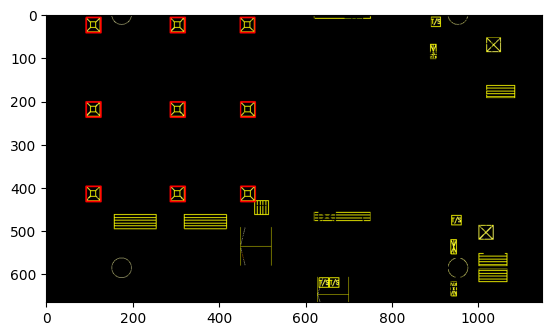

In [33]:
# Deep copy of the original image, as we are going to draw rectangle in it
# but not going to modify the original one
ori_copy = copy.deepcopy(img_yellow)
# score threshold: 0.2
cv2.normalize(result, result, 0, 1, cv2.NORM_MINMAX, -1)  # Here we normalize the result to rescale the result to 0-1 value.
loc = np.where(result < 0.2)
theight, twidth = yellow_template.shape[:2]
# draw rectangles
for index, other_loc in enumerate(zip(*loc[::-1])):
    cv2.rectangle(ori_copy, other_loc, (other_loc[0] + twidth, other_loc[1] + theight), (255, 0, 0), 2)
plt.imshow(ori_copy)
# What happens if we choose different score threshold?

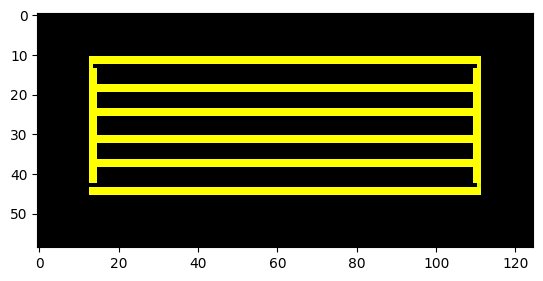

In [34]:
# Try a more difficult one?
# Here we load another components and see what will happen.
req_yellow_template2 = urllib.request.urlopen("https://raw.githubusercontent.com/SeanXunIC/CIVL4210/refs/heads/main/A3%20-%20Recognizing%20components%20in%202D%20drawing%20with%20CV/image/yellow_tem4.png")
yellow_template2 = np.asarray(bytearray(req_yellow_template2.read()), dtype="uint8")
yellow_template2 = cv2.imdecode(yellow_template2, cv2.IMREAD_COLOR)
yellow_template2 = cv2.cvtColor(yellow_template2, cv2.COLOR_BGR2RGB)

plt.imshow(yellow_template2)


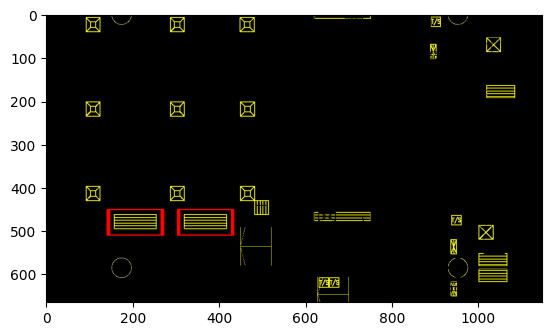

In [37]:
# Deep copy an original image
ori_copy = copy.deepcopy(img_yellow)
# Conduct template matching
theight, twidth = yellow_template2.shape[:2]
result = cv2.matchTemplate(ori_copy, yellow_template2, cv2.TM_SQDIFF_NORMED)
cv2.normalize(result, result, 0, 1, cv2.NORM_MINMAX, -1)

# Draw the matched range by rectangle
# We want to choose a suitable threshold to find the right matching pairs

# Question 2: What's the proper threshold for grill components?
# loc = np.where(result < ?)

for index, other_loc in enumerate(zip(*loc[::-1])):
    cv2.rectangle(ori_copy, other_loc, (other_loc[0] + twidth, other_loc[1] + theight), (255, 0, 0), 2)
plt.imshow(ori_copy)


We know that sometimes the **rotation** and **scale** of template will not exactly match the instances in drawings. Will the template matching method still works if we rotate the drawings?


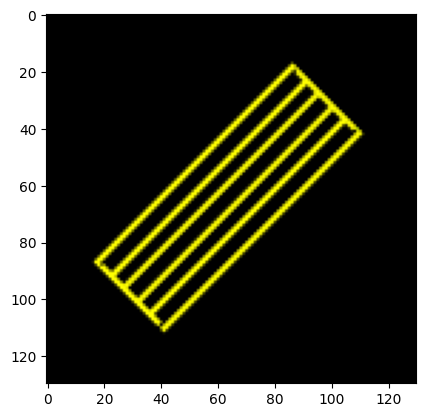

In [38]:
# Deep copy a template
template_rotate = copy.deepcopy(yellow_template2)
# Rotate template, here we use the getRotationMatrix2D and warpAffine function
center = (twidth/2, theight/2)  # define rotation center
angle = 45
scale = 1.0
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=scale)
cos = np.abs(rotate_matrix[0, 0])
sin = np.abs(rotate_matrix[0, 1])
nW = int((theight * sin) + (twidth * cos))
nH = int((theight * cos) + (twidth * sin))
rotate_matrix[0, 2] += (nW / 2) - center[0]
rotate_matrix[1, 2] += (nH / 2) - center[1]
template_rotate = cv2.warpAffine(src=template_rotate, M=rotate_matrix, dsize=(nW, nH))
# Show the rotated template
plt.imshow(template_rotate)

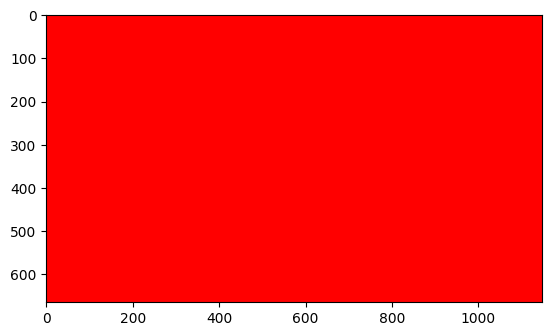

In [39]:
# Test whether the template matching still works
# Deep copy an original image
ori_copy2 = copy.deepcopy(img_yellow)
# Conduct template matching
theight, twidth = template_rotate.shape[:2]
result = cv2.matchTemplate(ori_copy2, template_rotate, cv2.TM_SQDIFF_NORMED)
cv2.normalize(result, result, 0, 1, cv2.NORM_MINMAX, -1)

# Draw the matched range by rectangle
loc = np.where(result < 0.2)

for index, other_loc in enumerate(zip(*loc[::-1])):
    cv2.rectangle(ori_copy2, other_loc, (other_loc[0] + twidth, other_loc[1] + theight), (255, 0, 0), 2)

plt.imshow(ori_copy2)

## Object detection using feature matching

Quick questions:
1. How do we play jigsaw puzzles?
2. How do we arrange lots of scrambled image pieces into a big single image?

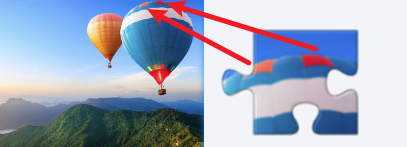

When we play jigsaw puzzles, we are looking for specific patterns or specific features which are unique, can be easily tracked and can be easily compared.

If we go for a definition of such a feature, we may find it difficult to express it in words, but we know what they are. If someone asks you to point out one good feature which can be compared across several images, you can point out one. That is why even small children can simply play these games. We search for these **features** in an image, find them, look for the **same features** in other images and **align them**. That's it.


### Feature extraction using SIFT (Scale-Invariant Feature Transform)

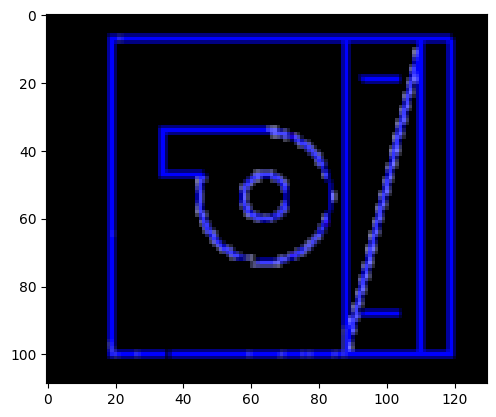

In [42]:
# load query image (likes the "template" we used in last section)
req_target = urllib.request.urlopen("https://raw.githubusercontent.com/SeanXunIC/CIVL4210/refs/heads/main/A3%20-%20Recognizing%20components%20in%202D%20drawing%20with%20CV/image/red1.png")
target = np.asarray(bytearray(req_target.read()), dtype="uint8")
template = cv2.imdecode(target, cv2.IMREAD_COLOR)
plt.imshow(template)

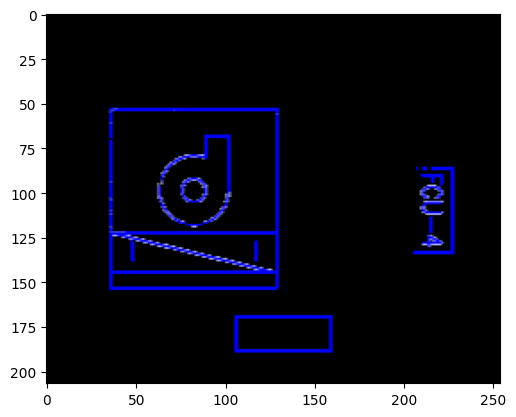

In [43]:
# load target image, we need to find query image in target image
req_target = urllib.request.urlopen("https://raw.githubusercontent.com/SeanXunIC/CIVL4210/refs/heads/main/A3%20-%20Recognizing%20components%20in%202D%20drawing%20with%20CV/image/red3.png")
target = np.asarray(bytearray(req_target.read()), dtype="uint8")
target = cv2.imdecode(target, cv2.IMREAD_COLOR)

plt.imshow(target)

In [44]:
# find the keypoints and descriptors with SIFT
sift = cv2.SIFT_create()

# Here we extract the feature in query image and target image
kp1, des1 = sift.detectAndCompute(template, None)
# Question 3: How to do the same operation for target image?
#


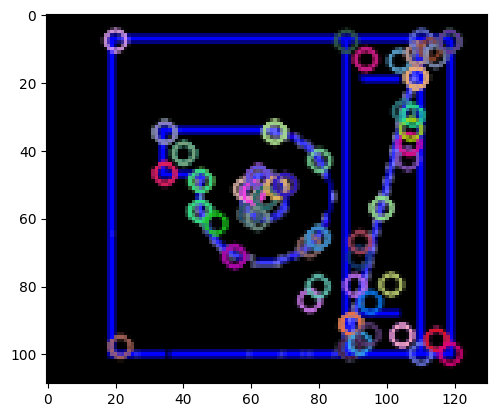

In [45]:
# Here we draw the extracted feature descriptors on query image
template_copy = copy.deepcopy(template)
template_copy=cv2.drawKeypoints(template_copy,kp1,template_copy)
plt.imshow(template_copy)

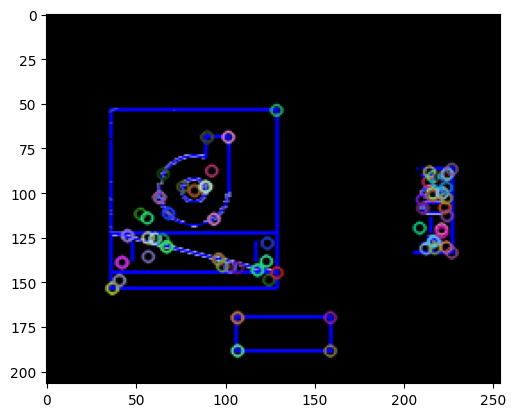

In [46]:
# Same operation, we draw the feature descriptors on target image
template_copy1 = copy.deepcopy(target)
template_copy1 = cv2.drawKeypoints(template_copy1,kp2,template_copy1)
plt.imshow(template_copy1)

### FLANN based Matcher
FLANN stands for Fast Library for Approximate Nearest Neighbors. It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features.

Here we use the KD-tree algorithm in FLANN to match query and target images by finding the corresponding feature descriptors.

In [47]:
index_params = dict(algorithm=1, trees=5)
# algorithm: Specifies the algorithm used to build the KD-tree.
# It can take two values: 1 for KD-tree with a randomized algorithm or 0 for KD-tree with a deterministic algorithm.
# trees: Specifies the number of parallel trees to use. A higher number of trees improves accuracy but increases search time.

search_params = dict(checks=100)
# It specifies the number of times the trees in the index should be recursively traversed.
# Higher values gives better precision, but also takes more time.

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)
# Specify the parameter k=2 for knn, which means that a feature descriptor in image A will
# find two corresponding feature descriptors in image B
# one being the best match with the minimum distance, and the other the next best

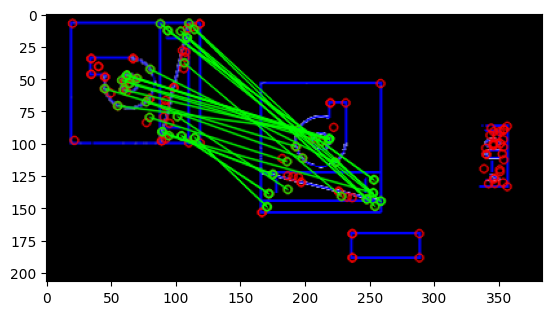

In [48]:
# visualize the matches
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper https://docs.opencv.org/3.4/d5/d6f/tutorial_feature_flann_matcher.html
for i,(m,n) in enumerate(matches):
 if m.distance < 0.7*n.distance:
  matchesMask[i]=[1,0]

draw_params = dict(
    matchColor = (0,255,0),
    singlePointColor = (255,0,0),
    matchesMask = matchesMask,
    flags = cv2.DrawMatchesFlags_DEFAULT
    )

# Question 4: How can we visualize the matching results?
# cv2.drawMatchesKnn(template_image,kp_of_template,target_image,kp_of_target,matches,None,**draw_params)

plt.imshow(img3)

It generally suitable for one-on-one matching. Modify is needed for multi-object matching.

Now we set a condition that at least 10 matches (defined by MIN_MATCH_COUNT) for finding the object.

If enough matches are found, we extract the locations of matched keypoints in both the images. They are passed to find the perspective transformation. Once we get this 3x3 transformation matrix, we use it to transform the corners of queryImage to corresponding points in target Image. Then we draw it.

In [49]:
# find good matches
# store all the good matches as per Lowe's ratio test.
good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

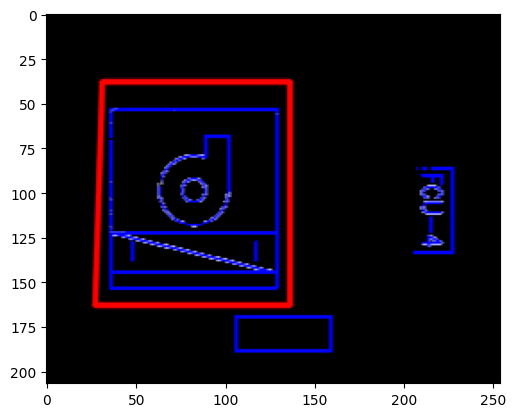

In [50]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    # locate the good matches,and reshape them into a 3D matrix
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # calculate tramformation matrix and MASK
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    h, w, _ = template.shape

    # tranform the four corners of the queryimage, and draw it on the target image
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)
    cv2.polylines(target, [np.int32(dst)], True, [255, 0, 0], 2, cv2.LINE_AA)
else:
    print("Not enough matches are found - %d/%d" % (len(good), MIN_MATCH_COUNT))
    matchesMask = None
plt.imshow(target)

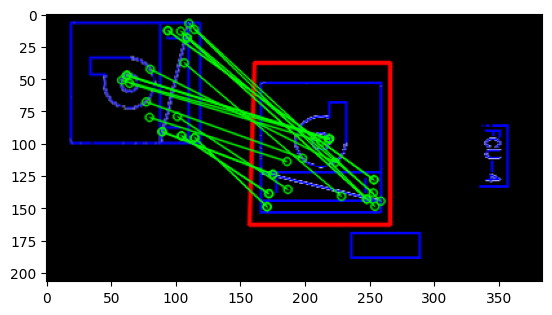

In [51]:
# visulze results
draw_params = dict(
    matchColor=(0, 255, 0),
    singlePointColor=None,
    matchesMask=matchesMask,
    flags=2)

# Question 5: How can we get the exact range of the component in target image?
# cv2.drawMatches(template_image, kp_of_template, target_image, kp_of_target, good_matches, None, **draw_params)

plt.imshow(result)

From the above image we can see that even the template rotates by 90°, the feature matching method still can find the matching components in targe image.